# Proyecto ciencia de datos

## Expectativas stakeholder:
"El objetivo de esta entrega es dar inicio a la creación del tablero en Power BI, que permitirá integrar y visualizar toda la información disponible. La idea es que este tablero se convierta en una herramienta dinámica, que pueda ser alimentada continuamente en el futuro con nuevos datos que vayamos recopilando."

#### Comentarios adicionales:
"Podemos revisar pacientes con complicaciones, infecciones, sobrevida, y revisar grupos etarios.


## Insumos entregados a corte 25 de septiembre de 2025

* Cirugias_Hepaticas_consolidado.xlsx   (Higado)
* Cirugias_Pancreaticas_Consolidado.xlsx (Pancreas)
* Colecistectomias_Laparoscopicas_consolidado.xlsx  (Vesicula biliar) "extracción de la vesícula biliar mediante laparoscopia" "técnica mínimamente invasiva (no se abre el abdomen por completo, sino que se usan pequeñas incisiones y una cámara)." -- suelen ser mas comunes, 
* Otras_cirugias_consolidado.xlsx 
* Trasplante_hepático_consolidado.xlsx



## Etapa 1: Entendimiento de los datos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [61]:
# Lectura de los datos
df_trans_hepatico = pd.read_excel('data/Trasplante hepático consolidado - Original.xlsx')

In [ ]:
# Revisión de tamaño e información del dataframe
print(df_trans_hepatico.shape)  
df_trans_hepatico.info()  
df_trans_hepatico.head(5)


(736, 285)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 285 columns):
 #    Column                                                           Non-Null Count  Dtype         
---   ------                                                           --------------  -----         
 0    #_Paciente                                                       736 non-null    int64         
 1    Año_Tx                                                           736 non-null    int64         
 2    Mes_Tx#1                                                         736 non-null    int64         
 3    Fecha_Tx                                                         736 non-null    datetime64[ns]
 4    Edad_Al_Tx                                                       736 non-null    float64       
 5    Sexo_Receptor                                                    736 non-null    int64         
 6    Código de anonimización                                      

,#_Paciente,Año_Tx,Mes_Tx#1,Fecha_Tx,Edad_Al_Tx,Sexo_Receptor,Código de anonimización,Fecha_nacimiento,EPS,Grupo_Sanguíneo_Receptor,RH_Receptor,COD_Grupo_Sanguíneo_Receptor,COD_RH_Receptor,Fecha-Enlistamiento,Tiempo_En_Lista_Días,Tiempo_En_Lista_Meses,Tiempo_En_Lista_Años,Causa_1_Tx_Hepático_,Causa_2_Tx_Hepático_,Hepatocarcinoma,Child_Pugh_Letra,MELD_Score,Causa_Tx_Renal,Peso_Pre_Tx,BMI,Composición_Corporal,Falla_Cardiaca_Pre_Tx,Enfermedad_Coronaria_Pre_Tx,Infarto_Cardiaco_Pre_Tx,Diabetes_Mellitus_Pre_Tx,Hipertensión_Arterial_Pre_Tx,Antecedente_De_Tabaquismo,Antecedente_De_Alcoholismo,Colesterol_TotalPre_Tx,LDL_Pre_Tx,HDL_Pre_Tx,Triglicéridos_Pre_Tx,Dislipidemia_Pre_Tx,MDRD_Score_Pre_Tx,MDRD_Categórico_PreTx,CMV_Receptor,EKG_PreQx,EKG_PreQx_Valor,Valvulopatía_Pre_Tx,Ecocardiograma_PreQx_FE%,Ecocardiograma_PreQx-FE_Cod,Ecocardiograma_PreQx_RC%,Ecocardiograma_PreQx_RC,Ecocardiograma_PreQxPSAP,Ecocardiograma_PreQx_Hipertensión_Pulmonar,...,Hepatocarcinoma.1,αFP_Al_Dx,#_Nódulos_Al_Dx,Diámetro_Nódulo_Principal_(cm)_Al_Dx,Sumatoria_#Nódulos_y_Diámetros_Al_Dx,Cumple_Milán,Cumple_UCSF,Cumple_Up_To_Seven,Terapia_Local_1,Terapia_Local_2,#_Sesiones,Fecha_última_Terapia_Local_PreTx,αFP_PreTx,Ca-19-9_PreTx,Neutrófilos_PreTx,Plaquetas_PreTx,Linfocitos_PreTx,NLR,PLR,PREMORAL_Valor,PREMORAL_Categoría,Patrón_Histológico,Grado_HCC,Invasión_Vascular,Trombosis_Porta_Tumoral,Invasión_Linfática,Invasión_Nerviosa,Necrosis_Tumoral,#Nódulos_Viables,Diámetro_Tumor_Viable_Más_Grande_Patología,Sumatoria_Nódulos_Viables_y_Diámetro_Tumor_Más_Grande_Patología,Ki67,Mitosis,p53,αFP_Patología,T,N,M,Estadio,POSTMORAL_Valor,POSTMORAL_Categoría,RETREAT_Valor,COMBOMORAL_Valor,COMBOMORAL_Categoría,αFP_1m_PostTx,αFP_6m_PostTx,αFP_1año_PostTx,Recurrencia_ HCC,Fecha_Recurrencia,Lugar_De_Recurrencia
0,1,1988,6,1988-06-02,14.00,2,TXHEP001,9999,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,23.0,0.0,0.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999,9999,9999,9999,9999,9999,9999,9999,9999,...,0.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999,9999.0
1,2,1989,1,1989-01-02,0.91,1,TXHEP002,9999,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,14.0,0.0,0.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999,9999,9999,9999,9999,9999,9999,9999,9999,...,0.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999,9999.0
2,3,1989,10,1989-10-21,28.00,2,TXHEP003,9999,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,23.0,0.0,0.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999,9999,9999,9999,9999,9999,9999,9999,9999,...,0.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999,9999.0
3,4,1990,9,1990-09-02,27.00,2,TXHEP004,9999,9999.0,9999,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,8.0,0.0,0.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,9999,9999,9999,9999,9999,9999,9999,9999,9999,...,0.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999,9999.0,9999.0,999

A partir del diccionario y al revisar el comportamiento del dataframe, podemos concluir que los valores de 9999 corresponden a datos nulos, <span style="color:red">se remplazaran con el fin de realizar un calculo mas preciso de completitud de la información </span>

In [57]:
df_trans_hepatico.replace([9999, 9999.0, '9999'], np.nan, inplace=True)
df_trans_hepatico.info()  
df_trans_hepatico.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 285 columns):
 #    Column                                                           Non-Null Count  Dtype         
---   ------                                                           --------------  -----         
 0    #_Paciente                                                       736 non-null    int64         
 1    Año_Tx                                                           736 non-null    int64         
 2    Mes_Tx#1                                                         736 non-null    int64         
 3    Fecha_Tx                                                         736 non-null    datetime64[ns]
 4    Edad_Al_Tx                                                       736 non-null    float64       
 5    Sexo_Receptor                                                    736 non-null    int64         
 6    Código de anonimización                                          736 non

C:\Users\jarat\AppData\Local\Temp\ipykernel_15280\1244434689.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trans_hepatico.replace([9999, 9999.0, '9999'], np.nan, inplace=True)


,#_Paciente,Año_Tx,Mes_Tx#1,Fecha_Tx,Edad_Al_Tx,Sexo_Receptor,Código de anonimización,Fecha_nacimiento,EPS,Grupo_Sanguíneo_Receptor,RH_Receptor,COD_Grupo_Sanguíneo_Receptor,COD_RH_Receptor,Fecha-Enlistamiento,Tiempo_En_Lista_Días,Tiempo_En_Lista_Meses,Tiempo_En_Lista_Años,Causa_1_Tx_Hepático_,Causa_2_Tx_Hepático_,Hepatocarcinoma,Child_Pugh_Letra,MELD_Score,Causa_Tx_Renal,Peso_Pre_Tx,BMI,Composición_Corporal,Falla_Cardiaca_Pre_Tx,Enfermedad_Coronaria_Pre_Tx,Infarto_Cardiaco_Pre_Tx,Diabetes_Mellitus_Pre_Tx,Hipertensión_Arterial_Pre_Tx,Antecedente_De_Tabaquismo,Antecedente_De_Alcoholismo,Colesterol_TotalPre_Tx,LDL_Pre_Tx,HDL_Pre_Tx,Triglicéridos_Pre_Tx,Dislipidemia_Pre_Tx,MDRD_Score_Pre_Tx,MDRD_Categórico_PreTx,CMV_Receptor,EKG_PreQx,EKG_PreQx_Valor,Valvulopatía_Pre_Tx,Ecocardiograma_PreQx_FE%,Ecocardiograma_PreQx-FE_Cod,Ecocardiograma_PreQx_RC%,Ecocardiograma_PreQx_RC,Ecocardiograma_PreQxPSAP,Ecocardiograma_PreQx_Hipertensión_Pulmonar,...,Hepatocarcinoma.1,αFP_Al_Dx,#_Nódulos_Al_Dx,Diámetro_Nódulo_Principal_(cm)_Al_Dx,Sumatoria_#Nódulos_y_Diámetros_Al_Dx,Cumple_Milán,Cumple_UCSF,Cumple_Up_To_Seven,Terapia_Local_1,Terapia_Local_2,#_Sesiones,Fecha_última_Terapia_Local_PreTx,αFP_PreTx,Ca-19-9_PreTx,Neutrófilos_PreTx,Plaquetas_PreTx,Linfocitos_PreTx,NLR,PLR,PREMORAL_Valor,PREMORAL_Categoría,Patrón_Histológico,Grado_HCC,Invasión_Vascular,Trombosis_Porta_Tumoral,Invasión_Linfática,Invasión_Nerviosa,Necrosis_Tumoral,#Nódulos_Viables,Diámetro_Tumor_Viable_Más_Grande_Patología,Sumatoria_Nódulos_Viables_y_Diámetro_Tumor_Más_Grande_Patología,Ki67,Mitosis,p53,αFP_Patología,T,N,M,Estadio,POSTMORAL_Valor,POSTMORAL_Categoría,RETREAT_Valor,COMBOMORAL_Valor,COMBOMORAL_Categoría,αFP_1m_PostTx,αFP_6m_PostTx,αFP_1año_PostTx,Recurrencia_ HCC,Fecha_Recurrencia,Lugar_De_Recurrencia
0,1,1988,6,1988-06-02,14.00,2,TXHEP001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2,1989,1,1989-01-02,0.91,1,TXHEP002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,3,1989,10,1989-10-21,28.00,2,TXHEP003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,4,1990,9,1990-09-02,27.00,2,TXHEP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,5,1990,9,1990-09-18,37.00,2,TXHEP005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


### Dado que tenemos muchas variables, para facilitar el entendimiento de los datos a cada variable se le da una categoria.

In [ ]:
# Diccionario de categorías

cols = df_trans_hepatico.columns.tolist()
df_vars = pd.DataFrame({'Variable': cols})

categorias = {
    'Identificación del paciente': ['#_Paciente',	'Edad_Al_Tx',	'Sexo_Receptor',
    'Código de anonimización ',	'Fecha_nacimiento',	'EPS',	'Grupo_Sanguíneo_Receptor',	'RH_Receptor',	
    'COD_Grupo_Sanguíneo_Receptor',	'COD_RH_Receptor',	'Fecha-Enlistamiento',
    'Tiempo_En_Lista_Días',	'Tiempo_En_Lista_Meses',	'Tiempo_En_Lista_Años',	
    'BMI',	'Composición_Corporal',	'Enfermedad_Coronaria_Pre_Tx',	
    'Edad_Donante_Tx#1',	'Sexo_Donante_Tx#1',	'Edad_Donante_Tx#2',
    'Sexo_Donante_Tx#2',	'Edad_Donante_Tx#3',	'Sexo_Donante_Tx#3'
    ],

    'Trasplante y cirugía': ['Año_Tx',	'Mes_Tx#1',	'Fecha_Tx',	'Causa_1_Tx_Hepático_',
    'Causa_2_Tx_Hepático_',	'Causa_Tx_Renal',	'Peso_Pre_Tx',	'Falla_Cardiaca_Pre_Tx',	
    'Infarto_Cardiaco_Pre_Tx',	'Diabetes_Mellitus_Pre_Tx',	'Hipertensión_Arterial_Pre_Tx',	
    'Colesterol_TotalPre_Tx',	'LDL_Pre_Tx',	'HDL_Pre_Tx',	'Triglicéridos_Pre_Tx',	
    'Dislipidemia_Pre_Tx',	'MDRD_Score_Pre_Tx',	'MDRD_Categórico_PreTx',	
    'Valvulopatía_Pre_Tx',	'Tx#1',	'Causa_Muerte_Donante_Tx#1',	'CMV_Donante_Tx#1',
    'Cirujano_Rescate_1_Tx#1',	'Cirujano_Rescate_2_Tx#1',	'Tipo_de_Cx-Trasplante_Tx#1',	
    'Trasplante_Combinado-Hígado-Riñón_Tx#1',	'Tiempo_Isquemia_Fría_Tx#1',	
    'Tiempo_Isquemia_Caliente_Tx#1',	'Arterialización_Portal',	'Injerto_Aórtico_Tx#1',	
    '#_Unidades_Glóbulos_Rojos_Tx#1',	'#_Unidades_Plasma_Fresco_Congelado_Tx#1',	
    '#_Unidades_Crioprecipitados_Tx#1',	'#_Unidades_Plaquetas_Tx#1',	
    'Tiempo_Quirúrgico_Tx#1',	'Antibiótico_Profiláctico_VS_Terapéutico',	
    'Días_Tratamiento_Antibiótico_Previo_A_Tx#1',	'Antibiótico_1__Tx#1',	'Antibiótico_2_Tx#1',	
    'Antibiótico_3_Tx#1',	'Antifúngico_Tx#1',	'Tiempo_De_Dosis_Hasta_Tx#1',	'Cirujano_Principal_Tx#1',	
    'Cirujano_Ayudante_Tx#1',	'Fecha_Colocación_Sonda_Vesical',	'Fecha_Colocación_CVC',	
    'Soporte_Vasopresor_PeriTx',	'Levosimendan_PeriTx ',	'Levosimendam_Dosis',	
    'Noradrenalina_PeriTx',	'Noradrenalina_Dosis',	'Adrenalina_PeriTx',	
    'Vasopresina_PeriTx',	'Vasopresina_Dosis',	'Dopamina_PeriTx',	'Dopamina_Dosis',	
    'Amiodarona_PeriTx',	'Amiodarona_Dosis',	'Tx_Soporte_Inotrópico',	
    'Retrasplante',	'Indicación_Retrasplante',	'Fecha-Enlistamiento_Tx#2',	
    'Año_Tx2 (si no retx, poner año tx)',	'Fecha_Tx#2',	'Mes_Tx#2',	'Días_Reenlistado_Tx#2',	
    'Días_Desde_Tx#1',	'Causa_Muerte_Donante_Tx#2',	'CMV_Donante_Tx#0',	'Cirujano_Rescate_1_Tx#2',	
    'Cirujano_Rescate_2_Tx#2',	'Tipo_de_Cx-Trasplante_Tx#2',	'Tiempo_Isquemia_Fría_Tx#2',	'Tiempo_Isquemia_Caliente_Tx#2',	
    'Injerto_Aórtico_Tx#2',	'#_Unidades_Glóbulos_Rojos_Tx#2',	'#_Unidades_Plasma_Fresco_Congelado_Tx#2',	
    '#_Unidades_Crioprecipitados_Tx#2',	'#_Unidades_Plaquetas_Tx#2',	'Tiempo_Quirúrgico_Tx#2',	
    'Días_Tratamiento_Antibiótico_Previo_A_Tx#2',	'Antibiótico_1_Tx#2',	'Antibiótico_2_Tx#2',	
    'Antibiótico_3_Tx#2',	'Antifúngico_Tx#2',	'Segunda_Dosis_Tx#2',	'Tiempo_De_Dosis_Hasta_Tx#2',	
    'Cirujano_Principal_Tx#2',	'Cirujano_Ayudante_Tx#2',	'Re_Re trasplante',	'Indicación_Re_Re_trasplante',	
    'Fecha-Enlistamiento_Tx#3',	'Año_Tx#3',	'Fecha_Tx#3',	'Mes_Tx#3',	'Días_Reenlistado_Tx#3',	'Días_Desde_Tx#1',	'Causa_Muerte_Donante_Tx#3',	
    'CMV_Donante_Tx#3',	'Cirujano_Rescate_1_Tx#3',	'Cirujano_Rescate_2_Tx#3',	'Tipo_de_Cx-Trasplante_Tx#3',	'Tiempo_Isquemia_Fría_Tx#3',	'Tiempo_Isquemia_Caliente_Tx#3',	
    'Injerto_Aórtico_Tx#3',	'#_Unidades_Glóbulos_Rojos_Tx#3',	'#_Unidades_Plasma_Fresco_Congelado_Tx#3',	'#_Unidades_Crioprecipitados_Tx#3',	'#_Unidades_Plaquetas_Tx#3',	
    'Tiempo_Quirúrgico_Tx#3',	'Cirujano_Principal_Tx#3',	'Cirujano_Ayudante_Tx#3',	'Años_Desde_El_Tx',	'Fecha_Tx_A_PTLD',	'Tiempo_Tx_A_PTLD',	'Neoplasia_PostTx',	'Fecha_Neoplasia_PostTx',	
    'Tiempo_Tx_A_Neoplasia_PostTx',	'Fecha_última_Terapia_Local_PreTx',	'αFP_PreTx',	'Ca-19-9_PreTx',	'Neutrófilos_PreTx',	'Plaquetas_PreTx',	'Linfocitos_PreTx',	'αFP_1m_PostTx',	
    'αFP_6m_PostTx',	'αFP_1año_PostTx'
    ],

    'Hepatocarcinoma y cáncer': ['Hepatocarcinoma',	'Hepatocarcinoma',	'αFP_Al_Dx',	'#_Nódulos_Al_Dx',	'Diámetro_Nódulo_Principal_(cm)_Al_Dx',	
    'Sumatoria_#Nódulos_y_Diámetros_Al_Dx',	'Cumple_Milán',	'Cumple_UCSF',	'Cumple_Up_To_Seven',	'Terapia_Local_1',	'Terapia_Local_2',	'#_Sesiones',	'Patrón_Histológico',
    'Grado_HCC',	'Invasión_Vascular',	'Trombosis_Porta_Tumoral',	'Invasión_Linfática',	'Invasión_Nerviosa',	'Necrosis_Tumoral',	'#Nódulos_Viables',	'Diámetro_Tumor_Viable_Más_Grande_Patología',
    'Sumatoria_Nódulos_Viables_y_Diámetro_Tumor_Más_Grande_Patología',	'Ki67',	'Mitosis',	'p53',	'αFP_Patología',	'T',	'N',	'M',	'Estadio',

    ],

    'Scores clínicos': ['Child_Pugh_Letra',	'MELD_Score',	'PREMORAL_Valor',	'PREMORAL_Categoría',	'POSTMORAL_Valor',	'POSTMORAL_Categoría',	'RETREAT_Valor',	'COMBOMORAL_Valor',	'COMBOMORAL_Categoría'
    ],

    'Comorbilidades y antecedentes': ['Antecedente_De_Tabaquismo',	'Antecedente_De_Alcoholismo',	'Ecocardiograma_PreQx_Hipertensión_Pulmonar',	'Andrenalina_Dois',	'Falla_Cardiaca_POP'
    ],

    'Evaluaciones diagnósticas': ['CMV_Receptor',	'EKG_PreQx',	'EKG_PreQx_Valor',	'Ecocardiograma_PreQx_FE%',	'Ecocardiograma_PreQx-FE_Cod',	'Ecocardiograma_PreQx_RC%',	'Ecocardiograma_PreQx_RC',	
    'Ecocardiograma_PreQxPSAP',	'Ecocardiograma_PreQx_TAPSE ',	'Ecocardiograma_PreQx_TASVE',	'Ecocardiograma_PreQx_Disfunción_Diastólica',	'METS',	'EKG_VALOR_POP',	'Ecocardiograma_POP_FE%',	
    'Ecocardiograma_POP_PASP',	'Ecocardiograma_POP_Otros',	'NLR',	'PLR'
    ],

    'Seguimiento y sobrevida': [
       'Fecha_Retiro_Sonda_Vesical',	'Tiempo_Sonda_Vesical',	'Fecha_Retiro_CVC',	'Tiempo_CVC',	'Días_de_Profilaxis_Antitrombótica',	'Días_En_Hospitalización_Piso',	'Días_Totales_Intrahospitalarios',	'Vivo_Hoy',	'Fecha_Control/Muerte',	'Sobrevida_Días',	'Sobrevida_Meses',	'Sobrevida_Años',	'Último_Análisis_De_Mortalidad',	'Causa_De_Muerte',	'Sobrevida_Injerto_#1',	'Control_Injerto_#1',	'Días_Sobrevida_Injerto_#1',	'Meses_Sobrevida_Injerto_#1',	'Años_Sobrevida_Injerto_#1',	'Sobrevida_Injerto_#2',	'Control_Injerto_#2',	'Días_Sobrevida_Injerto_#2',	'Meses_Sobrevida_Injerto_#2',	'Años_Sobrevida_Injerto_#2',	'Sobrevida_Injerto_#3',	'Control_Injerto_#3',	'Días_Sobrevida_Injerto_#3',	'Meses_Sobrevida_Injerto_#3',	'Años_Sobrevida_Injerto_#3',	'PTLD',	'Recurrencia_ HCC',	'Fecha_Recurrencia',	'Lugar_De_Recurrencia',

    ],

    'Postoperatorio y complicaciones': ['Bilirrubina_Total_POP',	'COD_ Bilirrubina_Total_POP',	'Bilirrubina_Directa_POP',	'COD_Bilirrubina_Directa',	'¿Complicación?',	'#_De_Complicaciones',	'Tipo_De_Complicación_1',
    'Inmunosupresor_1',	'Inmunosupresor_2',	'Inmunosupresión_con_Anticuerpos',	'Rechazo_Agudo',	'Severidad_Rechazo_Agudo',	'Rechazo_Crónico',	'Infección_POP',	'Tipo_Infección_1',	'Germen_1',	'Fecha_Infección_1',
    'Tiempo_Desde_Tx_Infección_1',	'Tipo_Infección_2',	'Germen_2',	'Fecha_Infección_2',	'Tiempo_Desde_Tx_Infección_2',	'Tipo_Infección_3',	'Germen_3',	'Fecha_Infección_3',	'Tiempo_Desde_Tx_Infección_3',	'Stent',
    'Requirió_Reconstrucción_Biliar',	'Fecha_Reconstrucción_Biliar',	'Tiempo_Reconstrucción_Biliar',	'Profilaxis_Antitrombótica',	'Medicamento_Antitrombótica',	'Arritmia_POP',	'Infarto_POP',	'Fast_Track',	
    'Días_En_UCI',	'Fecha_Egreso_UCI ',	'Fecha_Egreso_Hospitalario',	'Sobrevida_PeriQx_30_días_POP',	'Complicación_Asociada'
    ]
}

def clasificar_variable(var):
    for categoria, palabras in categorias.items():
        if var in palabras:
            return categoria
    return 'Otras / No clasificadas'


df_vars['Categoría'] = df_vars['Variable'].apply(clasificar_variable)

# Vista general
df_vars.groupby('Categoría').size().sort_values(ascending=False)

df_vars.to_excel('clasificacion_variables_df_trans_hepatico.xlsx', index=False)



## Etapa 2: Limpieza y enriquecimiento del dataset


In [ ]:
df_trans_hepatico.loc[
    df_trans_hepatico['Cumple_Up_To_Seven'].notnull() &
].value_counts('Cumple_Up_To_Seven')


Cumple_Up_To_Seven
9999.0    527
1.0        65
0.0        22
Name: count, dtype: int64

In [45]:
df_trans_hepatico.loc[
    df_trans_hepatico['Estadio'].notnull() ].value_counts('Estadio')


Estadio
9999.0    532
1.0        53
2.0        37
3.0         8
4.0         1
Name: count, dtype: int64

In [19]:
df_trans_hepatico[['Amiodarona_Dosis','Amiodarona_PeriTx']].loc[
    df_trans_hepatico['Amiodarona_PeriTx']== 1
]


,Amiodarona_Dosis,Amiodarona_PeriTx
62,300,1.0
87,300,1.0
120,150,1.0
132,300MG,1.0
134,150MG STAT / 15 MG/HORA,1.0
139,300 MG BOLO X2Y POSTERIOR 30 MG HORA/ complet...,1.0
152,9999,1.0
155,400,1.0
158,NV,1.0
167,BOLO Y EINFUSION,1.0


# Revisión de las variables
Se hará analisis univariado con el fin de identificar el estado de la calidad de los datos, comenzando por los que tienen mayor porcentaje de no nulidad 

In [ ]:
df_cir_pancreas['Año'] = pd.to_numeric(df_cir_pancreas['Año'], errors='coerce').fillna(0).astype(int)

df_cir_pancreas["Año"].describe()

count     764.000000
mean     1822.952880
std       496.213133
min         0.000000
25%      1900.000000
50%      1900.000000
75%      2017.000000
max      2025.000000
Name: Año, dtype: float64

In [ ]:
df_cir_pancreas["Año"].value_counts()

Año
1900    371
0        52
2023     33
2024     29
2018     26
2022     23
2015     22
2021     21
2019     21
2017     21
2016     20
2014     18
2012     16
2011     13
2020     12
2010     12
2008     10
2025     10
2006     10
2013      9
2007      6
2009      5
2005      3
2004      1
Name: count, dtype: int64

In [ ]:
print(df_cir_pancreas.shape)
df_cir_pancreas = df_cir_pancreas[df_cir_pancreas["Año"] > 1900]
df_cir_pancreas.shape

(764, 240)


(341, 240)

In [ ]:
df_cir_pancreas["Sexo"].value_counts()

Sexo
2.0    185
1.0    154
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Edad"].describe()

count    326.000000
mean      60.042945
std       14.129010
min       10.000000
25%       51.000000
50%       61.500000
75%       69.000000
max       88.000000
Name: Edad, dtype: float64

In [ ]:
df_cir_pancreas["Diagnóstico_Histológico_#1"].value_counts()


Diagnóstico_Histológico_#1
1.0     135
2.0      62
5.0      35
3.0      22
4.0      19
10.0      8
6.0       8
19.0      6
7.0       5
13.0      4
9.0       4
15.0      3
0.0       3
17.0      3
12.0      2
14.0      2
21.0      1
11.0      1
20.0      1
16.0      1
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Tipo_de_Pancreatectomía"].value_counts()


# Define qué tipo de Cx se hizo

# PANCREATODUODENECTOMÍA
# PANCREATECTOMÍA DISTAL
# PANCREATECTOMÍA TOTAL


Tipo_de_Pancreatectomía
1.0    191
2.0    107
3.0     19
4.0      6
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Laparoscópica"].value_counts()


Laparoscópica
0.0    234
1.0     83
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Esplenectomía"].value_counts()


Esplenectomía
0.0    191
1.0    125
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Cirujano_#1"].value_counts()

Cirujano_#1
1.0    302
3.0      6
2.0      6
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Ecografía_Intraoperatoria"].value_counts()

Ecografía_Intraoperatoria
0.0    234
1.0     77
6.0      1
9.0      1
Name: count, dtype: int64

In [ ]:
df_cir_pancreas['Ecografía_Intraoperatoria'] = df_cir_pancreas['Ecografía_Intraoperatoria'].replace({6.0: 0.0, 9.0: 0.0})
#df_cir_pancreas['Ecografía_Intraoperatoria'] = df_cir_pancreas['Ecografía_Intraoperatoria'].replace([6, 9], 0)


In [ ]:
df_cir_pancreas["UGRE"].value_counts()

UGRE
0.0     254
2.0      29
3.0       9
1.0       8
5.0       3
4.0       3
6.0       3
9.0       2
13.0      1
10.0      1
Name: count, dtype: int64

# Le daré otro enfoque a la revisión
Dado que los datos son capturados por los medicos en su rural, y esta actividad lo que hace es rescatar la mayor cantidad de datos posible, esto implica que variables con bajo porcentaje de no nulidad no deban ser no priorizados, por ello, se realizará una revisión de las variabes basado en 3 enfoques resaltados por la parte interesada que son:

* Determinar clasificación etaria y revision de variables demograficas
* Mostrar posibles determinantes de  complicaciones postquirurgicas 
* Mostrar existencia de infecciones
* Analisar sobrevida.


In [ ]:
df_cir_pancreas["Edad"].describe()

count    326.000000
mean      60.042945
std       14.129010
min       10.000000
25%       51.000000
50%       61.500000
75%       69.000000
max       88.000000
Name: Edad, dtype: float64

Text(0.5, 1.0, 'Distribución de edades')

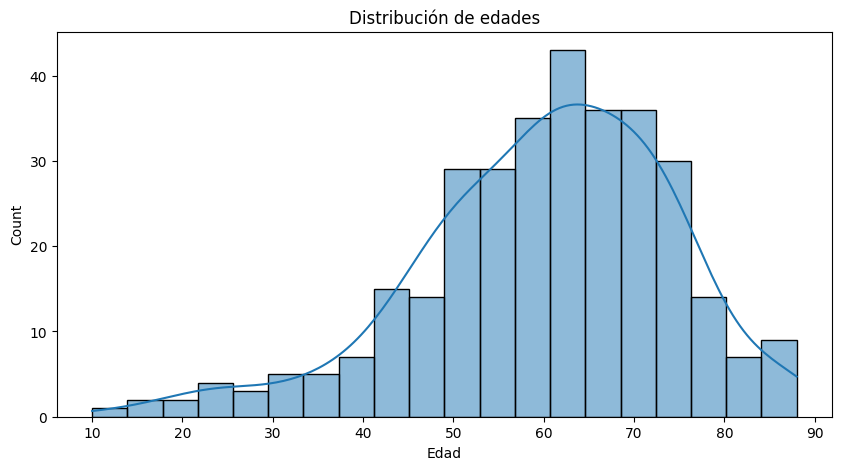

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_cir_pancreas, x='Edad', bins=20, kde=True)
plt.title("Distribución de edades")



In [ ]:
df_cir_pancreas.loc[df_cir_pancreas['Edad'] < 30].head(5)


,#,Año,Mes,Código de anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Comorbilidades,Antecedente_Médico,Tabaquismo,Tóxicos,Trasfusión_Previa,Cx_Abdominal_Previa,Antecedentes_Qx,Peso,Talla,BMI,Grupo_Sanguíneo,RH,Síntomas,Fecha_Inicio_Síntomas,Patología_Base,Ag_Carcinoembrionario,Fecha_Ag_Carcinoembrionario,CA19-9,Fecha_Ca_19-9,Alphafetoporteína,Fecha_Alphafeotoproteína,CA125,Fecha_Ca125,Ácido Vanililmandélico,Ecografía,Fecha_Ecografía,TAC,Fecha_TAC,MRI,Fecha_MRI,Medicina_Nuclear,Fecha_Medicina_Nuclear,OCTREOSCAN,Fecha_OCTREOSCAN,PET,Fecha_PET,EKG_Valor,Ecocardiograma_Valor,Fracción_Eyección%,Eco_Stres,Frecuencia _Cardiaca_Máxima%,...,Gastrina,Insulina,Glucagón,Ki67,Índice_Mitótico,Metástasis_Hepática,Otras_Metástasis,T,N,M,Estadio,Hemoglobina_Consulta_Ext,Hematorcrito_Consulta_Ext,Palwuetas_Consulta_Ext,PT_Consulta_Ext,INR_Consulta_Ext,PTT_Consulta_Ext,Creatinin_Consulta_Ext,BUN_Consulta_Ext,Fosfatasa_Alcalina_Consulta_Ext,AST_Consulta_Ext,ALT_Consulta_Ext,Bilirrubina_Total_Consulta_Ext,0,Albúmina_Consulta_Ext,Glucosa__Consulta_Ext,Sodio__Consulta_Ext,Potasio_Consulta_Ext,Cloro_Consulta_Ext,Calcio_Iónico_Consulta_Ext,Magnesio_Consulta_Ext,Ag-Carginoembrionario_Postoperatorio,Fecha_Ag-Carginoembrionario_Postoperatorio,Ca19-9_Postoperatorio,Fecha_Ca19-9_Postoperatorio,Alpha_Feotproteína_Postoperatorio,Fecha_Alpha_Fetoproiteína_Postoperatorio,Quimioterapia_Adyuvante,Esquema_Adyuvante,Fecha_Inicio_Adyuvante,Fecha_Terminación_Adyuvante,Cambio_Esquema_Neoadyuvante,Nuevo_Esquema_Adyuvante,Recurrencia,Lugar_Recurrencia,Fecha_Recurrencia,Complicación_Tardía,¿Cuál?.1,Vivo\n(Revisión Diciembre/2023),Fecha_Control/Muerte
25,26,2008,8.0,PAN026,16.0,2.0,2008-08-13,1992-07-25,26,NaN,0,NaN,0.0,0.0,0.0,NO,NaN,NaN,NaN,NaN,NaN,1,2008-08-03 00:00:00,10.0,0.9,2008-08-04 00:00:00,4.2,2008-08-04 00:00:00,NaN,NaN,23.1,2008-08-04 00:00:00,NaN,1,2008-08-03 00:00:00,1,2008-08-03 00:00:00,2,NaN,2.0,NaN,2.0,NaN,2.0,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,14.59,47.11,485000.0,10.9,1.06,30.0,0.84,13.9,111.0,21.0,18.0,0.60,0.3,4.8,95.0,136.0,4.2,9999.0,9999.0,9999.0,0.4,2009-07-30 00:00:00,6.5,2009-07-30 00:00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,1,2022-06-30 00:00:00
72,73,2012,10.0,PAN073,28.0,2.0,2012-10-24,1984-10-09,17,26,0,0.0,1.0,0.0,1.0,COLELAP,47.0,158,19,B+,NaN,1,2010-09-01 00:00:00,8.0,1.5,2012-10-04 00:00:00,37.7,2012-10-04 00:00:00,2.4,2012-10-04 00:00:00,6.8,2012-10-04 00:00:00,11.3,1,2012-09-03 00:00:00,1,2012-09-18 00:00:00,1,2012-10-04 00:00:00,2.0,NaN,0.0,2012-10-18 00:00:00,2.0,NaN,0,0,66,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,14.10,43.00,641000.0,9999.0,9999.00,9999.0,0.63,18.6,59.0,17.0,13.0,0.59,0.1,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,1.48,2013-01-14 00:00:00,29.1,2013-01-14 00:00:00,2.12,2013-01-14 00:00:00,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NO,1,2023-12-31 00:00:00
101,102,2014,11.0,PAN102,24.0,2.0,2014-11-20,1990-09-01,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2014-09-01 00:00:00,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO VOLVIO A LA FUNDACION - PENDIENTE,NO REGISTRA,NO REGISTRA,NO REGISTRA,NO REGISTRA,NO REGISTRA,NO VOLVIÓ A CONTROL,NO VOLVIÓ A CONTROL,NO VOLVIÓ A CONTROL,NO VOLVIÓ A CONTROL,NO VOLVIÓ A CONTROL,0,2017-02-02 00:00:00
117,118,2015,8.0,PAN118,17.0,1.0,2015-08-31,1998-10-19,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2015-07-01 00:00:00,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1,0.0,0.0,IA,14.90,44.60,255000.0,9999.0,1.26,9999.0,1.03,9.2,88.9,116.6,61.9,0.47,9999.0,4.2,92.3,9999.0,9999.0,9999.0,9999.0,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,136,2016,5.0,PAN136,23.

In [ ]:
bins = [0, 39, 59, 74, 120]
labels = ['18-39', '40-59', '60-74', '75+']
df_cir_pancreas['Grupo_Edad'] = pd.cut(df_cir_pancreas['Edad'], bins=bins, labels=labels, right=True)


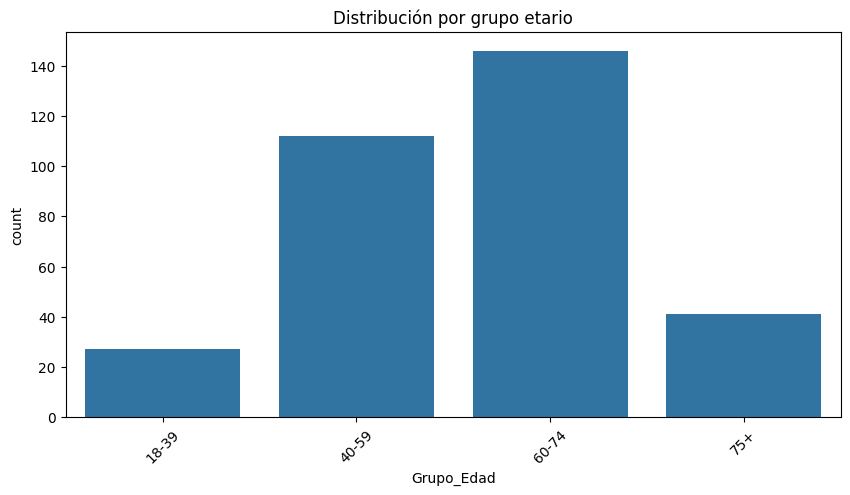

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_cir_pancreas, x='Grupo_Edad',order=['18-39', '40-59', '60-74', '75+'])
plt.xticks(rotation=45)
plt.title("Distribución por grupo etario")
plt.show()

In [ ]:
df_cir_pancreas['Sexo'] = df_cir_pancreas['Sexo'].replace({1.0: 'Masculino', 2.0: 'Femenino'})


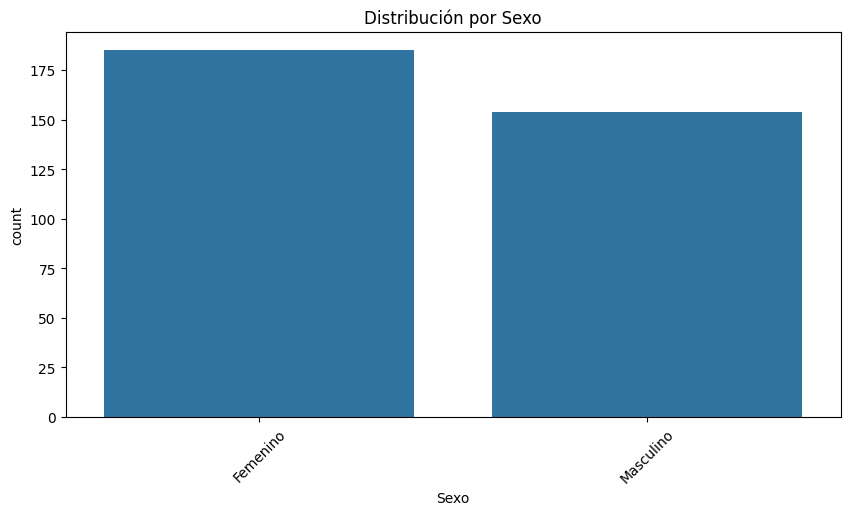

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_cir_pancreas, x='Sexo')
plt.xticks(rotation=45)
plt.title("Distribución por Sexo")
plt.show()

In [ ]:
# Pasar mes a categorica ordinal
df_cir_pancreas['Mes'] = df_cir_pancreas['Mes'].replace({1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                                                         7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'  })
df_cir_pancreas['Mes'].value_counts()


Mes
Abril         39
Noviembre     37
Agosto        36
Marzo         32
Octubre       30
Septiembre    28
Mayo          28
Febrero       28
Enero         26
Junio         21
Diciembre     21
Julio         13
Name: count, dtype: int64

In [ ]:
df_cir_pancreas['Cx_Abdominal_Previa'] = pd.to_numeric(df_cir_pancreas['Cx_Abdominal_Previa'], errors='coerce').fillna(0).astype(int)
df_cir_pancreas["Cx_Abdominal_Previa"].value_counts()


Cx_Abdominal_Previa
0    210
1    131
Name: count, dtype: int64

Las comorbilidades estan separadas en su mayoria por Y, se limpiara el dato y se obtendra el numero de comorbilidades por paciente, para determinar si tiene implicaciones en las preguntas de stakeholder como complicaciones, infecciones o supervivencia.

In [ ]:
df_cir_pancreas["Comorbilidades"].unique()

array([28, '10 Y 22', 8, 15, 26, '8 Y 9 Y 16', '9 Y 19 Y 23 ', 23, 9, nan,
       '22, 16, 31', 3, '8 y 9 y 10', '8 Y 9 Y 12 Y 22', 10,
       '8 Y 9 Y 10 ', '8 Y 16', '8 y 9', '1 Y 9 ', '8 Y 9 Y 16 Y 18 Y 31',
       '9 Y18 Y 22', 'NO', '8 Y 9 ', '9 Y 10 Y 22', 22, 0,
       '8 Y 9 Y 10 Y 23', 32, '1 y 30',
       'CIRROSIS BILIAR PRIMARIA, SJOGREN, RAYNAUD', '1 Y 9 Y 25',
       '9 Y 10 Y 18 Y 22', '23 y 25', '22 y 29', 31, '30 y 9', '9 y 7',
       29, '9 Y 27 ', 16, '8 y 9 y 12 y 22 y 23', '9 Y 22 Y 21',
       '9 y 10 y 22', '24, 25', 1, '6 y 9 y 10', 'CARDIOVASCULAR',
       '8 y 10', '10, 31', '21,31,', '2,9,10,31', 19.31, '10,15,22',
       '9, 31', '28, 23', '8, 9', 9.1, '8, 22, 30', '8, 9, 15, 30',
       '4, 8, 9, 22', '8, 9, 30', '9, 16', '10, 22', 9.22, 7.28,
       '9,10,22', 7, '8,10,32', '8,9,10,30', 22.25, '8,9,21,22,25,30', 30,
       5, '8,15,22', '8,9,22', 18.3, 8.3, 30.32, 10.32, '8,9,12,30,32',
       '22, 32', '15, 30, 32', '8, 32', '22, 25, 32', '9, 15, 32',
   

In [ ]:
import re  # Libreria de expresiones regulares

def contar_comorbilidades(valor):
    if pd.isna(valor):
        return 0
    if isinstance(valor, (int, float)):
        return 1
    if isinstance(valor, str):
        valor = valor.upper().strip()
        if valor in ['NO', 'CARDIOVASCULAR']:
            return 0  # 
        # Reemplazar separadores comunes por 'Y'
        valor = re.sub(r'[,\s]+', 'Y', valor)
        valor = re.sub(r'Y+', 'Y', valor)  # evitar múltiples Y seguidas
        # Extraer solo números
        numeros = re.findall(r'\d+', valor)
        return len(numeros)
    return 0

df_cir_pancreas['N_Comorbilidades'] = df_cir_pancreas['Comorbilidades'].apply(contar_comorbilidades)


print(df_cir_pancreas[['Comorbilidades', 'N_Comorbilidades']].head(10))
print(df_cir_pancreas['N_Comorbilidades'].value_counts())




  Comorbilidades  N_Comorbilidades
0             28                 1
1        10 Y 22                 2
2              8                 1
3             15                 1
4             26                 1
5              8                 1
6     8 Y 9 Y 16                 3
7   9 Y 19 Y 23                  3
8             26                 1
9             26                 1
N_Comorbilidades
0    181
1     99
2     27
3     21
4      9
5      3
6      1
Name: count, dtype: int64


In [ ]:
df_cir_pancreas['Tiene_Comorbilidades'] = df_cir_pancreas['N_Comorbilidades'].apply(
    lambda x: 1 if x > 0 else 0
)
df_cir_pancreas['Tiene_Comorbilidades'].value_counts()

Tiene_Comorbilidades
0    181
1    160
Name: count, dtype: int64

In [ ]:
# Variable toxicos, convertirla en dicotomica 1 = Sí, 2 = No

def toxico(valor):
    if pd.isna(valor):
        return 0
    if isinstance(valor, (int, float)):
        return 1 if int(valor) in [1,2,3,4] else 0
    return 0

df_cir_pancreas['ConsumoToxico'] = df_cir_pancreas['Tóxicos'].apply(toxico)

df_cir_pancreas['ConsumoToxico'].value_counts()


ConsumoToxico
0    270
1     71
Name: count, dtype: int64

In [ ]:
df_cir_pancreas["Antecedente_Médico"].unique()

array([5, 5.6, 1.3, 0, 1, '2,3,5', 2.5, 2, '1, 6', 1.2, '1, 2', 6, '2, 4',
       '6, 7', 4, '2, 5, 2007', '6, 8', '2, 5', 7, '2, 6, 2007', '2, 3',
       '5, 6', 9, '2, 7', '2, 6, 2009', '1 Y 2', '1, 2, 6, 7', '1, 5',
       '1 Y 2 Y 4 Y 9', '2 Y 3', nan, '2 Y 6 Y 11', 2.6, '1 Y 2Y 6 Y11',
       '4 Y 5 Y 12 Y 17', '2 Y 12', '2 Y 6', '12 Y 13', '11 Y 18',
       '6 Y 7 Y 5', '2 Y 17', '2 Y 13 Y 4', 16, 15, '2 Y 14', 13,
       '1 Y 2 Y 11 Y 12', '7 Y 4', '1 Y 2 Y 11 Y 12 Y 13',
       '2 Y 4 Y 6 Y 11 Y 13', '4 Y 12', '2 Y 4 Y 6 Y 10', 'ACV',
       'GASTRITIS', 'HIPOTIROIDISMO',
       'SINDROME DE GILLES DE LA TOURRETTE, PANDAS', '4,6,11', '3,5,6',
       '3,5,9', '2, 4, 12', '2, 3, 4, 17', 6.18, '2, 6, 13, 16',
       '1, 4, 11, 17', 11, '1, 2, 17', '1, 2, 11', '1, 2, 3', 3, '6, 16',
       '1, 2, 4, 17', '2, 7, 9, 16', '1, 11, 5', '6, 11', '1, 11',
       '2, 11', 19, 2.11, 5.15, '2,6, 11', 1.6, '4, 6', '2, 4, 5, 6',
       '1, 2, 4, 6, 17', '2, 4, 11', '4, 11, 12', '1,2,11,17', 17

In [ ]:
# Ajuste de antecedentes medicos

def contar_antecedentes(valor):
    if pd.isna(valor):
        return 0
    if isinstance(valor, (int, float)):
        # Si es float, separa por punto
        partes = str(valor).split('.')
        return len([p for p in partes if p.isdigit()])
    if isinstance(valor, str):
        valor = valor.upper().strip()
        diagnosticos_excluir = [
            'ACV', 'GASTRITIS', 'HIPOTIROIDISMO',
            'SINDROME DE GILLES DE LA TOURRETTE, PANDAS'
        ]
        if any(dx in valor for dx in diagnosticos_excluir):
            return 0
        # Unificar separadores: coma, espacio, Y, punto
        valor = re.sub(r'[,\sYy\.]+', ',', valor)
        # Extraer solo números válidos (1–99)
        numeros = [int(n) for n in re.findall(r'\d+', valor) if 1 <= int(n) <= 99]
        return len(numeros)
    return 0


df_cir_pancreas['N_Antecedentes'] = df_cir_pancreas['Antecedente_Médico'].apply(contar_antecedentes)


print(df_cir_pancreas[['Antecedente_Médico', 'N_Antecedentes']].head(10))
print(df_cir_pancreas['N_Antecedentes'].value_counts())

df_cir_pancreas['Tiene_Antecedentes'] = df_cir_pancreas['N_Antecedentes'].apply(
    lambda x: 1 if x > 0 else 0
)

  Antecedente_Médico  N_Antecedentes
0                  5               1
1                5.6               2
2                1.3               2
3                  0               1
4                  5               1
5                  1               1
6              2,3,5               3
7                2.5               2
8                  5               1
9                  0               1
N_Antecedentes
0    134
1    107
2     54
3     27
4     16
5      3
Name: count, dtype: int64


In [ ]:
# df de datos demograficos

df_cir_pancreas_demograficos = df_cir_pancreas[["Código de anonimización ","Edad","Grupo_Edad","Sexo","Seguro","Comorbilidades","N_Comorbilidades","Tiene_Comorbilidades","Antecedente_Médico","N_Antecedentes","Tiene_Antecedentes","Tabaquismo","Tóxicos","ConsumoToxico",
                                               "Trasfusión_Previa","Cx_Abdominal_Previa","Antecedentes_Qx","Peso","Talla","BMI","Grupo_Sanguíneo","RH"
                                               ]]

df_cir_pancreas_demograficos.head(10)

,Código de anonimización,Edad,Grupo_Edad,Sexo,Seguro,Comorbilidades,N_Comorbilidades,Tiene_Comorbilidades,Antecedente_Médico,N_Antecedentes,Tiene_Antecedentes,Tabaquismo,Tóxicos,ConsumoToxico,Trasfusión_Previa,Cx_Abdominal_Previa,Antecedentes_Qx,Peso,Talla,BMI,Grupo_Sanguíneo,RH
0,PAN001,74.0,60-74,Femenino,25,28,1,1,5,1,1,1.0,1.0,1,0.0,1,RESECC TRANSDUOD TUMOR AMP VAT 01/03/2003,60.0,168,21,O+,NaN
1,PAN002,84.0,75+,Femenino,22,10 Y 22,2,1,5.6,2,1,1.0,1.0,1,0.0,1,"APENDICECTOMIA, SAFENECTOMIA BILATERAL, CESAREA",47.0,NaN,NaN,B+,NaN
2,PAN003,62.0,60-74,Femenino,4,8,1,1,1.3,2,1,1.0,1.0,1,0.0,1,"REVASCULARIZACION MIOCARDICA EN 1998, HISTEREC...",59.0,NaN,NaN,O+,NaN
3,PAN004,57.0,40-59,Femenino,3,15,1,1,0,1,1,1.0,1.0,1,0.0,1,HISTERECTOMIA POR HUA,74.0,1.65,27.2,NaN,NaN
4,PAN005,42.0,40-59,Femenino,12,26,1,1,5,1,1,0.0,0.0,0,0.0,1,LAPAROSC DIAGNOSTICA Y APENDICECTOMIA,55.0,164,22,O+,NaN
5,PAN006,78.0,75+,Masculino,17,8,1,1,1,1,1,0.0,0.0,0,0.0,0,FAQUECTOMIA,82.0,172,28,A+,NaN
6,PAN007,69.0,60-74,Femenino,17,8 Y 9 Y 16,3,1,"2,3,5",3,1,0.0,1.0,1,0.0,1,APENDICECTOMIA,96.0,165,35,A+,NaN
7,PAN008,73.0,60-74,Masculino,25,9 Y 19 Y 23,3,1,2.5,2,1,1.0,1.0,1,0.0,1,"PROSTATECTOMIA, APENDICECTOMIA, TIMECTOMIA",74.0,173,25,O+,NaN
8,PAN009,46.0,40-59,Femenino,19,26,1,1,5,1,1,0.0,0.0,0,1.0,1,CESAREA,57.0,18,23,O+,NaN
9,PAN010,61.0,60-74,Femenino,19,26,1,1,0,1,1,0.0,1.0,1,0.0,1,CESAREA,56.0,160,22,O+,NaN
